# Linear Regression


In [1]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


$$ f(x) = x^4-4x^3+2 $$

In [2]:
f=lambda x: x**4-4*x**3+2

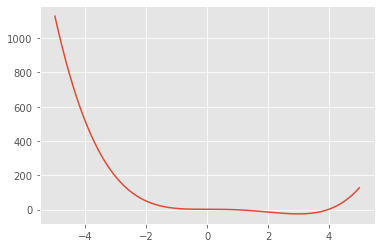

In [3]:
x=np.linspace(-5,5,1000)
y= f(x)
plt.plot(x,y)

### Brute-force Search
Lets do a brute-force search for the given variable in the limit.

In [4]:
minimum=+inf
mx=+inf
import numpy as np


for i in np.linspace(-5,5,1000):
    if f(i)<minimum:
        minimum=f(i)
        mx=i


print("Local minimum occurs at {}".format(mx))

Local minimum occurs at 2.997997997997998


### Gradient Descent

In [5]:
def f_derivative(x):
  
    # Calculate the derivative and write your code here
    first=(4*pow(x,3))
    derivative=first+12*pow(x,2)
    return derivative

In [6]:
x_old = 0
x_new = np.random.rand(1,1) 
eps = 0.01 # step size
precision = 0.00001

for i in np.linspace(-5,5):
    x_old=x_new
    x_new=x_old-f_derivative(x_old)*eps
    

print ("Local minimum occurs at", x_new)

Local minimum occurs at [[0.10882824]]


#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


#### Lets Check

In [7]:
eps=0.00001
x=1.5
dfx=(f(x+eps)-f(x))/eps
cdfx=f_derivative(x)

print (dfx, cdfx, dfx-cdfx)

-13.500044999936732 40.5 -54.00004499993673


### Let's generate some random data

In [8]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y

Text(0, 0.5, 'Y')

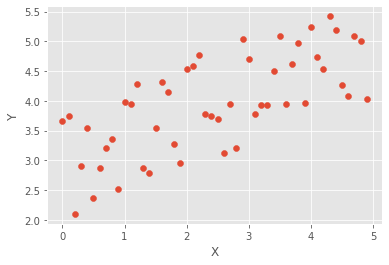

In [9]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

### Time for our regression implementation

$$
h(X, \theta) = X^T . \theta
$$

In [98]:
def hyp(theta, X):
    return numpy.dot(X, theta)

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [99]:
def cost_function(theta,X,Y):
    cost = numpy.sum(numpy.power(hyp(theta, X) - Y, 2))
    cost /= (2 * X.shape[0])
    return cost

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [100]:
def derivative_cost_function(theta,X,Y):
    cost = numpy.sum(numpy.dot(hyp(theta, X) - Y, X))
    cost /= X.shape[0]
    return cost

*** Give Temporary values to cost function and derivative cost function before getting onto gradiant descent***

*** To make sure that your both function are working fine ***

In [101]:
print (X.shape)
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print (nx.shape)

(50,)
(50, 2)


In [102]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print (thetas)

[0.5881308  0.89771373]


In [103]:
cf=cost_function(thetas,nx,Y)
print (cf)

1.5184678058336758


In [104]:
ad=derivative_cost_function(thetas,nx,Y)
print (ad)

-5.16160594540088


In [105]:
#Gradient Descent...
def GradientDescent(X,Y,maxniter=20000):
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],)
    
    alpha=0.01
    numiter=400
    xTrans = X.transpose()
    for i in range(0, numiter):
        hypothesis = hyp(thetas,X)
        loss = hypothesis.transpose() - Y
        Cost = sum(loss**2)/2.0*nexamples
        print (Cost)
        gradiants = numpy.dot(loss, X) / nexamples
        thetas = thetas - alpha * gradiants
    return thetas

In [106]:
theta_new=GradientDescent(nx,Y)

2225.6512851792463
2163.6455799592673
2110.984552821129
2066.0928192351807
2027.661464481525
1994.6029672199793
1966.0137482756384
1941.1430547438404
1919.3671077196168
1900.1676232467264
1883.1139667039893
1867.848325989637
1854.0733928379532
1841.5421279877023
1830.049257693948
1819.4242087058526
1809.5252383767847
1800.2345577358283
1791.4542795494342
1783.103051816279
1775.1132607461266
1767.4287068876868
1760.0026743666572
1752.7963267346865
1745.7773741791198
1738.9189661896055
1732.1987715428663
1725.598213918507
1719.1018368190423
1712.6967759207712
1706.372320682303
1700.1195501117395
1693.9310301476862
1687.8005622313924
1681.7229744104172
1675.6939477791238
1669.7098722783444
1663.767726887776
1657.864980084776
1651.9995071412686
1646.1695214103834
1640.3735172363117
1634.6102225211673
1628.8785593152604
1623.1776110735293
1617.506595450472
1611.864841696681
1606.2517718785557
1600.6668852744751
1595.109745410081
1589.5799692862465
1584.077218428811
1578.601191451906
1573.15

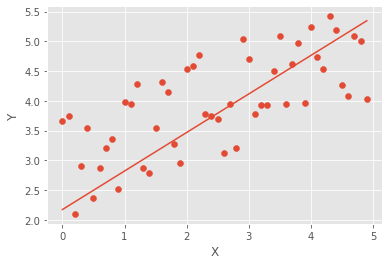

In [107]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new))